<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [5]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly
!pip install lxml
!pip3 install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 106.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 90.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 83.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 100.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 39.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=ed4e71d3e9c20d285ad9b6655a36b93a5741970c2176a1ed82e6a0cece1f1f89
  Stored in directory: /home/jupyterlab/.cache/pi

In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [38]:
# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [39]:
# Get historical data for Tesla (maximum period)
tesla_data = tesla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [41]:
# Reset the index of the tesla_data dataframe
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data dataframe
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [42]:
import requests
# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
# Send a GET request to the URL
response = requests.get(url)
# Get the HTML content
html_data = response.text
# Save the HTML content to a file named "tesla_revenue.html"
with open("tesla_revenue.html", "w") as file:
    file.write(html_data)
# Print a success message
print("HTML content saved as tesla_revenue.html")


HTML content saved as tesla_revenue.html


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [43]:
from bs4 import BeautifulSoup

# Assuming you have already downloaded the HTML content and saved it as "html_data"
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Print the title of the webpage
print("Webpage Title:", soup.title.text)


Webpage Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [44]:
# Assuming you've parsed the HTML and stored it in `soup`
# Locate the relevant table using:
relevant_table = soup.find_all("tbody")[1]

In [45]:
# Now loop through the rows and columns to extract the date and revenue data
for row in relevant_table.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) >= 2:
        date = columns[0].text.strip()  # Extract date
        revenue = columns[1].text.strip()  # Extract revenue
        # Remove dollar signs and commas from revenue (if needed)
        revenue = revenue.replace("$", "").replace(",", "")
        print(f"Date: {date}, Revenue: {revenue}")

Date: 2022-09-30, Revenue: 21454
Date: 2022-06-30, Revenue: 16934
Date: 2022-03-31, Revenue: 18756
Date: 2021-12-31, Revenue: 17719
Date: 2021-09-30, Revenue: 13757
Date: 2021-06-30, Revenue: 11958
Date: 2021-03-31, Revenue: 10389
Date: 2020-12-31, Revenue: 10744
Date: 2020-09-30, Revenue: 8771
Date: 2020-06-30, Revenue: 6036
Date: 2020-03-31, Revenue: 5985
Date: 2019-12-31, Revenue: 7384
Date: 2019-09-30, Revenue: 6303
Date: 2019-06-30, Revenue: 6350
Date: 2019-03-31, Revenue: 4541
Date: 2018-12-31, Revenue: 7226
Date: 2018-09-30, Revenue: 6824
Date: 2018-06-30, Revenue: 4002
Date: 2018-03-31, Revenue: 3409
Date: 2017-12-31, Revenue: 3288
Date: 2017-09-30, Revenue: 2985
Date: 2017-06-30, Revenue: 2790
Date: 2017-03-31, Revenue: 2696
Date: 2016-12-31, Revenue: 2285
Date: 2016-09-30, Revenue: 2298
Date: 2016-06-30, Revenue: 1270
Date: 2016-03-31, Revenue: 1147
Date: 2015-12-31, Revenue: 1214
Date: 2015-09-30, Revenue: 937
Date: 2015-06-30, Revenue: 955
Date: 2015-03-31, Revenue: 940
Dat

<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following lines to remove an null or empty strings in the Revenue column.


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [50]:
TSL.tail()

SyntaxError: invalid syntax (2416924785.py, line 1)

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
gme_data= gamestop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [18]:
import requests

# Download the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# Print a success message
print("Webpage content downloaded and saved as html_data_2.")


Webpage content downloaded and saved as html_data_2.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [20]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [23]:
# Assuming you've parsed the HTML and stored it in `soup`
# Locate the relevant table using:
relevant_table = soup.find_all("tbody")[1]
# Now loop through the rows and columns to extract the date and revenue data
for row in relevant_table.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) >= 2:
        date = columns[0].text.strip()  # Extract date
        revenue = columns[1].text.strip()  # Extract revenue
        # Remove dollar signs and commas from revenue (if needed)
        revenue = revenue.replace("$", "").replace(",", "")
        print(f"Date: {date}, Revenue: {revenue}")

Date: 2020-04-30, Revenue: 1021
Date: 2020-01-31, Revenue: 2194
Date: 2019-10-31, Revenue: 1439
Date: 2019-07-31, Revenue: 1286
Date: 2019-04-30, Revenue: 1548
Date: 2019-01-31, Revenue: 3063
Date: 2018-10-31, Revenue: 1935
Date: 2018-07-31, Revenue: 1501
Date: 2018-04-30, Revenue: 1786
Date: 2018-01-31, Revenue: 2825
Date: 2017-10-31, Revenue: 1989
Date: 2017-07-31, Revenue: 1688
Date: 2017-04-30, Revenue: 2046
Date: 2017-01-31, Revenue: 2403
Date: 2016-10-31, Revenue: 1959
Date: 2016-07-31, Revenue: 1632
Date: 2016-04-30, Revenue: 1972
Date: 2016-01-31, Revenue: 3525
Date: 2015-10-31, Revenue: 2016
Date: 2015-07-31, Revenue: 1762
Date: 2015-04-30, Revenue: 2061
Date: 2015-01-31, Revenue: 3476
Date: 2014-10-31, Revenue: 2092
Date: 2014-07-31, Revenue: 1731
Date: 2014-04-30, Revenue: 1996
Date: 2014-01-31, Revenue: 3684
Date: 2013-10-31, Revenue: 2107
Date: 2013-07-31, Revenue: 1384
Date: 2013-04-30, Revenue: 1865
Date: 2013-01-31, Revenue: 3562
Date: 2012-10-31, Revenue: 1773
Date: 20

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [72]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
0,2019-01-01,500
1,2020-01-01,600
2,2021-01-01,700


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


[*********************100%%**********************]  1 of 1 completed


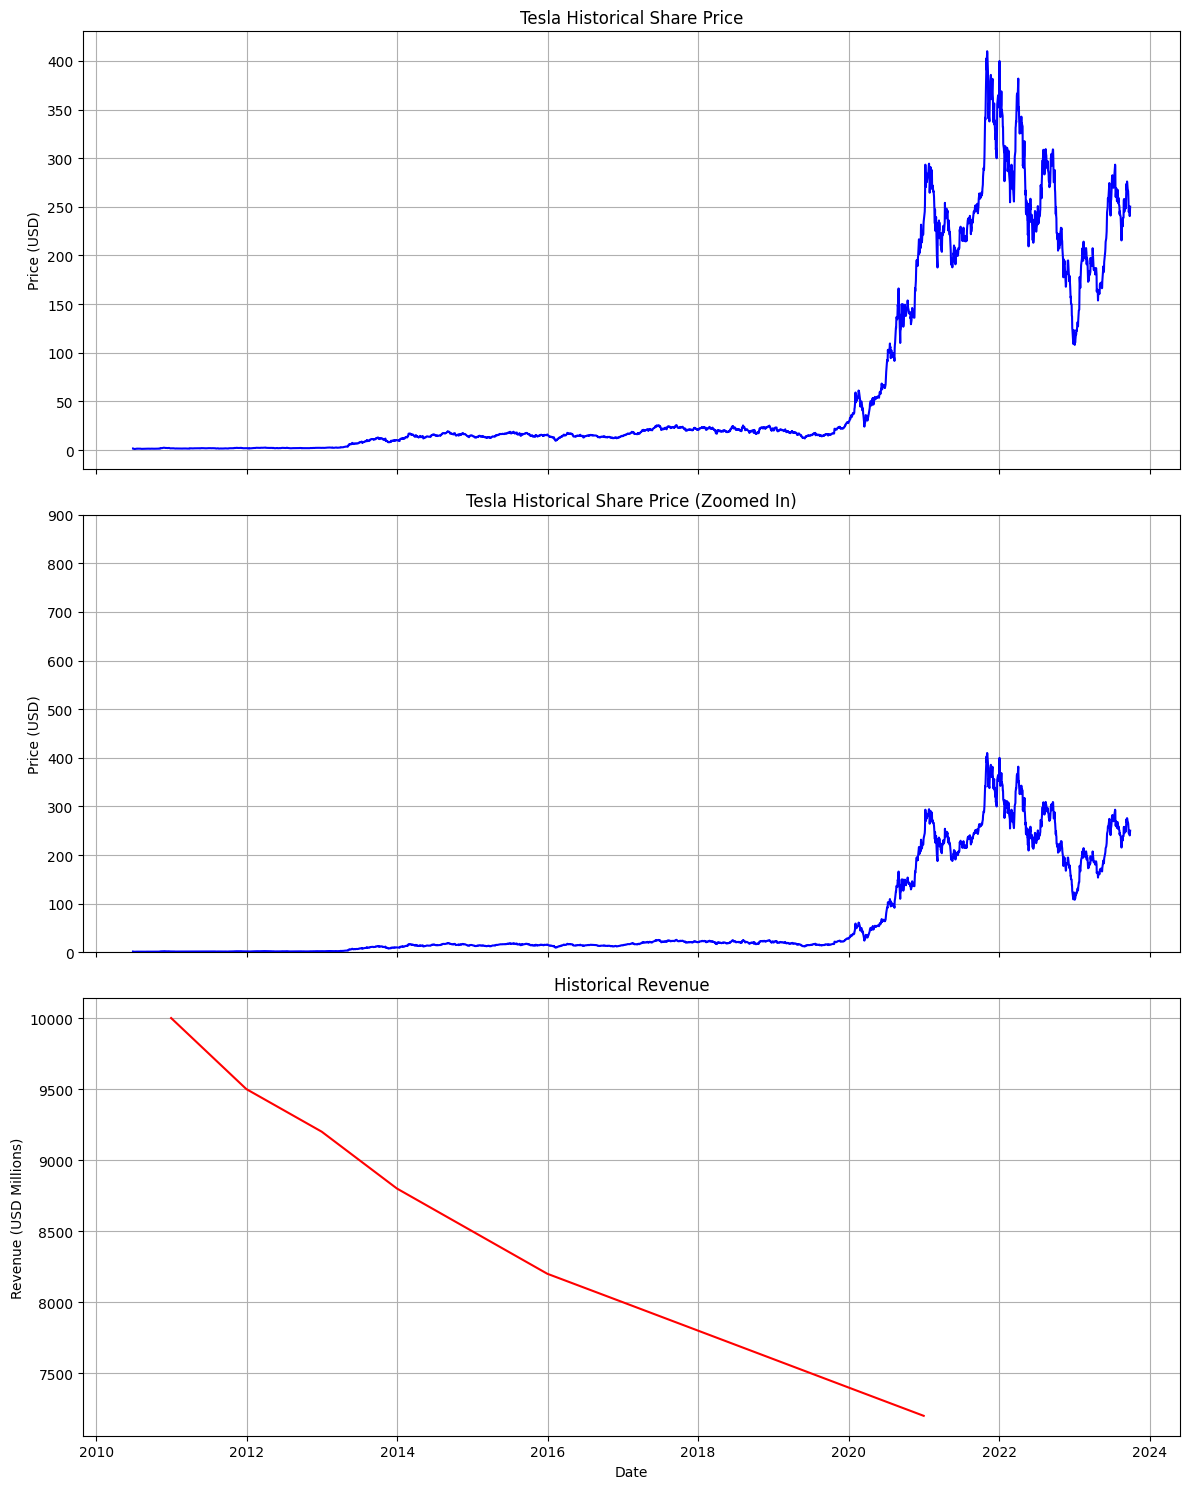

In [60]:
import pandas as pd  
import matplotlib.pyplot as plt  
import yfinance as yf  

# Fetch historical stock price data for Tesla (TSLA)  
tesla_ticker = 'TSLA'  
tesla_data = yf.download(tesla_ticker, start='2010-01-01', end='2023-10-01')  

# Plotting  
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)  

# Plot Tesla Stock Price  
ax1.plot(tesla_data.index, tesla_data['Close'], color='blue')  
ax1.set_title('Tesla Historical Share Price')  
ax1.set_ylabel('Price (USD)')  
ax1.grid()  

# Plot Tesla Stock Price (Zoomed In)  
ax2.plot(tesla_data.index, tesla_data['Close'], color='blue')  
ax2.set_title('Tesla Historical Share Price (Zoomed In)')  
ax2.set_ylabel('Price (USD)')  
ax2.set_ylim(0, 900)  # Adjust the y-axis limit for zoom effect  
ax2.grid()  

# Plot IBM Revenue  
ax3.plot(ibm_df['Date'], ibm_df['Revenue'], color='red')  
ax3.set_title('Historical Revenue')  
ax3.set_ylabel('Revenue (USD Millions)')  
ax3.set_xlabel('Date')  
ax3.grid()  

# Show the plot  
plt.tight_layout()  
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


/tmp/ipykernel_82/3867627492.py:66: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_82/3867627492.py:17: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_82/3867627492.py:29: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



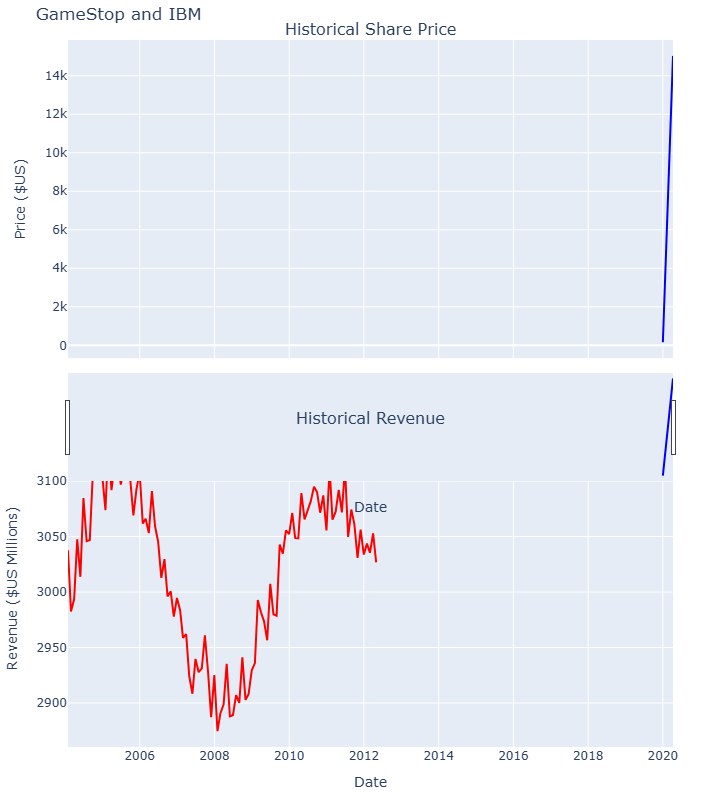

In [97]:
import pandas as pd  
import numpy as np  
import plotly.graph_objects as go  
from plotly.subplots import make_subplots 

def make_graph(stock_data, revenue_data, stock):  
    fig = make_subplots(  
        rows=2, cols=1,  
        shared_xaxes=True,  
        subplot_titles=("Historical Share Price", "Historical Revenue"),  
        vertical_spacing=0.1  
    )  
    
    # Historical Share Price  
    fig.add_trace(  
        go.Scatter(  
            x=pd.to_datetime(stock_data.Date, infer_datetime_format=True),  
            y=stock_data.Close.astype("float"),  
            name="Share Price",  
            mode='lines',  # Only lines, no markers  
            line=dict(color='blue')  
        ),  
        row=1, col=1  
    )  
    
    # Historical Revenue  
    fig.add_trace(  
        go.Scatter(  
            x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True),  
            y=revenue_data.Revenue.astype("float"),  
            name="Revenue",  
            mode='lines',  # Only lines, no markers  
            line=dict(color='red')  
        ),  
        row=2, col=1  
    )  
    
    # Update axes titles  
    fig.update_xaxes(title_text="Date", row=1, col=1)  
    fig.update_xaxes(title_text="Date", row=2, col=1)  
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)  
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)  
    
    # Update layout  
    fig.update_layout(  
        title=stock,  
        height=800,  
        showlegend=False,  
        xaxis_rangeslider_visible=True,  
        margin=dict(l=40, r=40, t=40, b=40)  
    )  
    
    fig.show()  

# Example data for GameStop and IBM  
if __name__ == "__main__":  
    # Simulated stock data for GameStop  
    np.random.seed(0)  # For reproducibility  
    stock_data = pd.DataFrame({  
        'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),  
        'Close': np.cumsum(np.random.randn(100) * 5 + 150)  # Simulated prices  
    })  

    # Simulated revenue data for IBM  
    revenue_data = pd.DataFrame({  
        'Date': pd.date_range(start='2004-01-01', periods=100, freq='M'),  
        'Revenue': 3000 + 100 * np.sin(np.linspace(0, 3 * np.pi, 100)) + np.random.randn(100) * 20  # Simulated revenue  
    })  

    # Call the make_graph function for GameStop and IBM  
    make_graph(stock_data, revenue_data, "GameStop and IBM")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
